<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab_02_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Click the Google Colab image at the top of the page to launch the lab in Google Colab: screenshot-2021-09-08-9-15-39- (1).png 

The following link provides a brief tutorial on how to use Google Colab: https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow

#Lab #02: Linear Regression & K-Means

# Import Python Libraries

Importing Python libraries extend data-type and function capabilities that are outside the core Python language. The Pandas library is a Python library that is widely used to open, view, manipulate, and analyze data. The Sklearn library is used for machine learning algorithms such as Linear Regression and K-Means. Matplotlib is used for plotting data visualizations.

In [13]:
import pandas as pd #pandas for dataframes
from sklearn.linear_model import LinearRegression #sklearn.linear_model for the Linear Regression model 
import sklearn.metrics as metrics #to measure model performance
import matplotlib.pyplot as plt #for plotting
from sklearn.cluster import KMeans #for kmeans algorithm

plt.rcParams['figure.figsize'] = [15,8] #defining plot size

# Open Data
We will use the pandas read_csv() function to import a CSV file from a URL and store the data into a Pandas dataframe.

In this case we are reading a comma delimited text file (.csv) from: https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv

This particular text file contains data related to medical charges. The dataset contains 7 different variables; 6 independent (age, BMI, sex, smoker, children, region); 1 dependent (charges).

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Select X & Y
Suppose we wanted to use a person's age to predict their medical charges, under the general assumption that a person's medical care costs increase as the person ages. The "age" column will be the X variable in your linear regression equation, while the "charges" column will be the Y variable of the equation. X and Y will have the datatype of a Python list.

In [16]:
X = df[['age']]
Y = df['charges']

#Build Model
We use the X and Y list variables from above to fit a linear regression model. We then compare our model's performance and predicting medical charges against the actual value.

In [17]:
linear_regressor = LinearRegression() #linear regression model
linear_regressor.fit(X, Y) #fit model
Y_pred = linear_regressor.predict(X) #make predictions

#Plot Equation

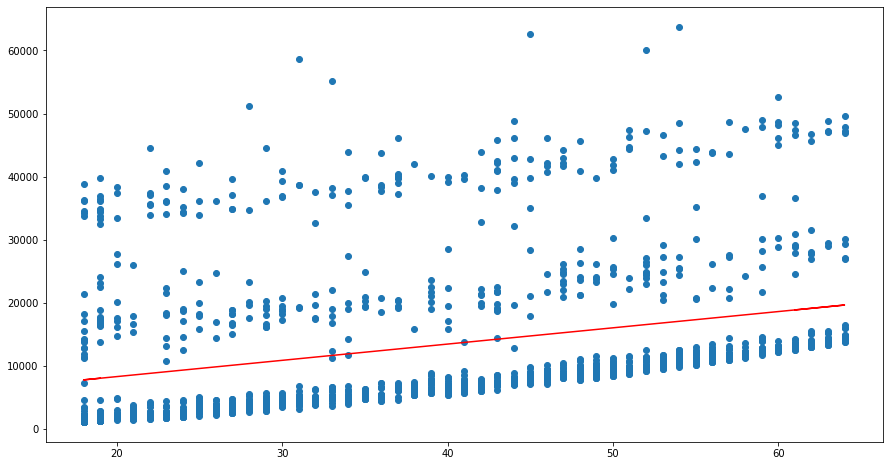

In [18]:
plt.scatter(X, Y) #plot points
plt.plot(X, Y_pred, color='red') #plot regression line
plt.show() #display plot

#Mean Square Error
The mean square error (MSE) represents the average of the squares of the errors, which is a metric for evaluating the performances of a regression model.

In [19]:
metrics.mean_squared_error(Y, Y_pred)

133440978.61376347

#Equation
To get the linear regression equation of: 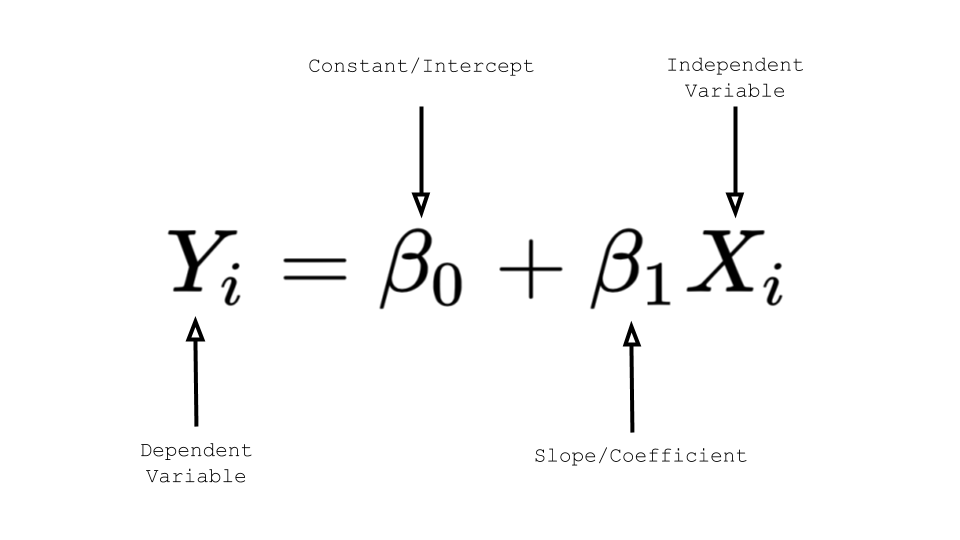

Use the *intercept_* and *coef_* (slope) attributes of our linear regression model.

In [20]:
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_[0])


intercept: 3165.885006063021
slope: 257.72261866689564


If we wanted to predict the medical charges for someone who is of the age 55, we could do the following:

In [21]:
linear_regressor.intercept_ + linear_regressor.coef_[0] * (55)

17340.629032742283

#K-Means Clustering
K-Means clustering is a way to mathematically segment data into groups, where "K" is the number of groups.

#Selecting Fields
In this case we want to use the age and BMI columns to segment the data.

In [22]:
df_numeric = df[['age','bmi']]
df_numeric.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


#K=3

We use the KMeans function to build clusters of size K (3 in this example). We can then visualize the data on a scatter plot, and each cluster is automatically assigned a distinct color, with the centroid of each cluster in red. 


The *cluster_centers_* attribute of the KMeans model provides the coordinates for each of the clusters.

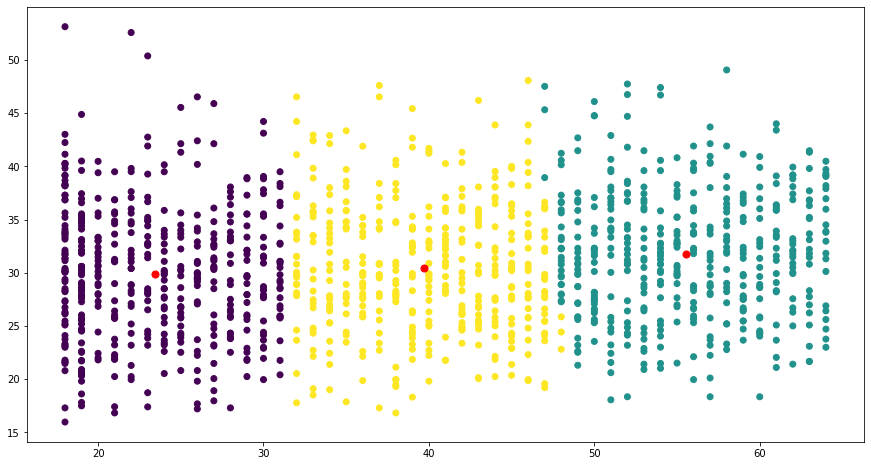

--------------
Cluster: 1: [23.42250531 29.89234607]
Cluster: 2: [55.54977376 31.72504525]
Cluster: 3: [39.70352941 30.41378824]


In [23]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['age'], df_numeric['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

#K=5

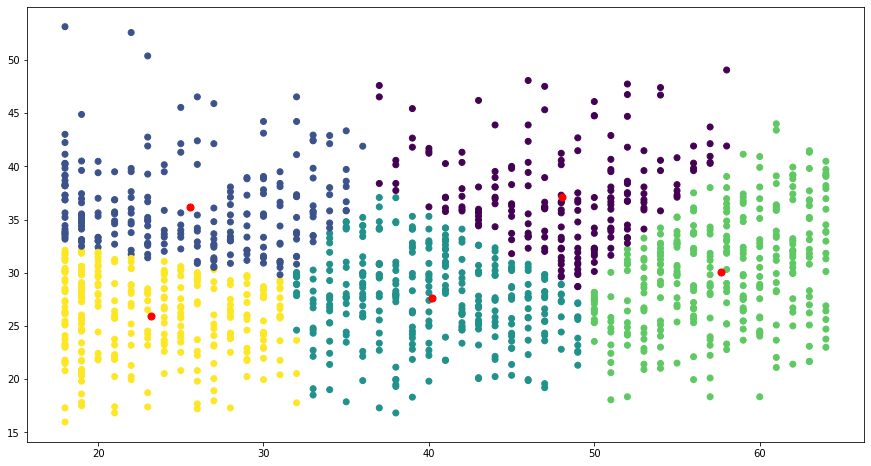

--------------
Cluster: 1: [48.05641026 37.15284615]
Cluster: 2: [25.5814978  36.13715859]
Cluster: 3: [40.18380062 27.65518692]
Cluster: 4: [57.64495114 30.06887622]
Cluster: 5: [23.21180556 25.94175347]


In [24]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['age'], df_numeric['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()


print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

#Lab Task #1

Plot the linear regression model that predicts medical charges given BMI.

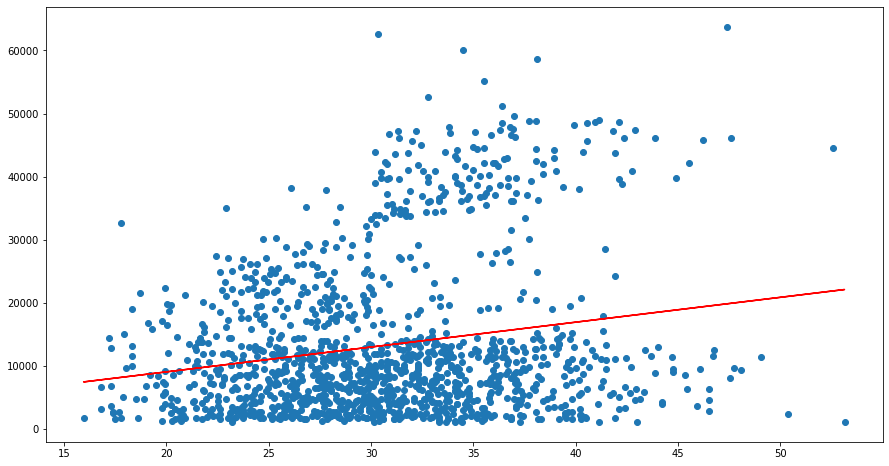

In [27]:
X = df[['bmi']]
Y = df['charges']

linear_regressor = LinearRegression() #linear regression model
linear_regressor.fit(X, Y) #fit model
Y_pred = linear_regressor.predict(X) #make predictions

plt.scatter(X, Y) #plot points
plt.plot(X, Y_pred, color='red') #plot regression line
plt.show() #display plot

#Lab Task #2
Construct and plot K-Means cluster (K=4) for BMI and charges.

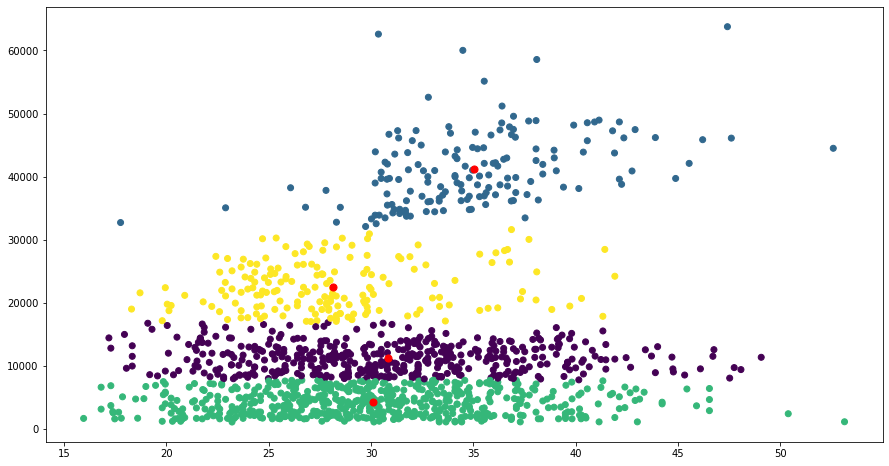

--------------
Cluster: 1: [   30.8438009  11326.88140439]
Cluster: 2: [3.50450000e+01 4.12245808e+04]
Cluster: 3: [  30.09846018 4239.1677826 ]
Cluster: 4: [   28.16511364 22525.02041614]


In [29]:
df_numeric = df[['bmi','charges']]

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['bmi'], df_numeric['charges'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()


print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

Q1. What is the predicted medical charges given a BMI of 35?


In [31]:
linear_regressor.intercept_ + linear_regressor.coef_[0] * (35)

14978.493286869983

Q2. What is the MSE of the linear regression model where X is BMI and Y is the charges?



In [30]:
metrics.mean_squared_error(Y, Y_pred)

140777900.09850755

Q3. What are the coordinates of the centroids of the KMeans clusters (K=4) for BMI and charges?

30.8438009 , 11326.88140439

**Email your responses to Questions #1-#3 to your instructor.**